<a href="https://colab.research.google.com/github/kasireddyasam/Credit-Score-Classification-with-Machine-Learning/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to my Credit Score Classification

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [ ]:
# checking for no of null values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
# removing null rows
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

0

## since "Credit_Score" is our target column ,Lets see the Unique values there in and at what percentage each of the them contributes

In [ ]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
# find % of Poor
print("Good",df[df["Credit_Score"]=="Good"].shape[0]/df.shape[0]*100)
print("Standard",df[df["Credit_Score"]=="Standard"].shape[0]/df.shape[0]*100)
print("Poor",df[df["Credit_Score"]=="Poor"].shape[0]/df.shape[0]*100)

Good 17.828
Standard 53.174
Poor 28.998


## list of all columns

In [ ]:
 cols = pd.DataFrame(df.columns)
cols.T

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## Compair Credit score with other featurs using Box plot

<ipython-input-77-1e177f9921e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0],palette='rainbow')
<ipython-input-77-1e177f9921e4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1],palette='rainbow')
<ipython-input-77-1e177f9921e4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2],palette='rainbow')
<ipython-input-77-1e177f9921e4>:11: FutureWarning: 

Passing `palette

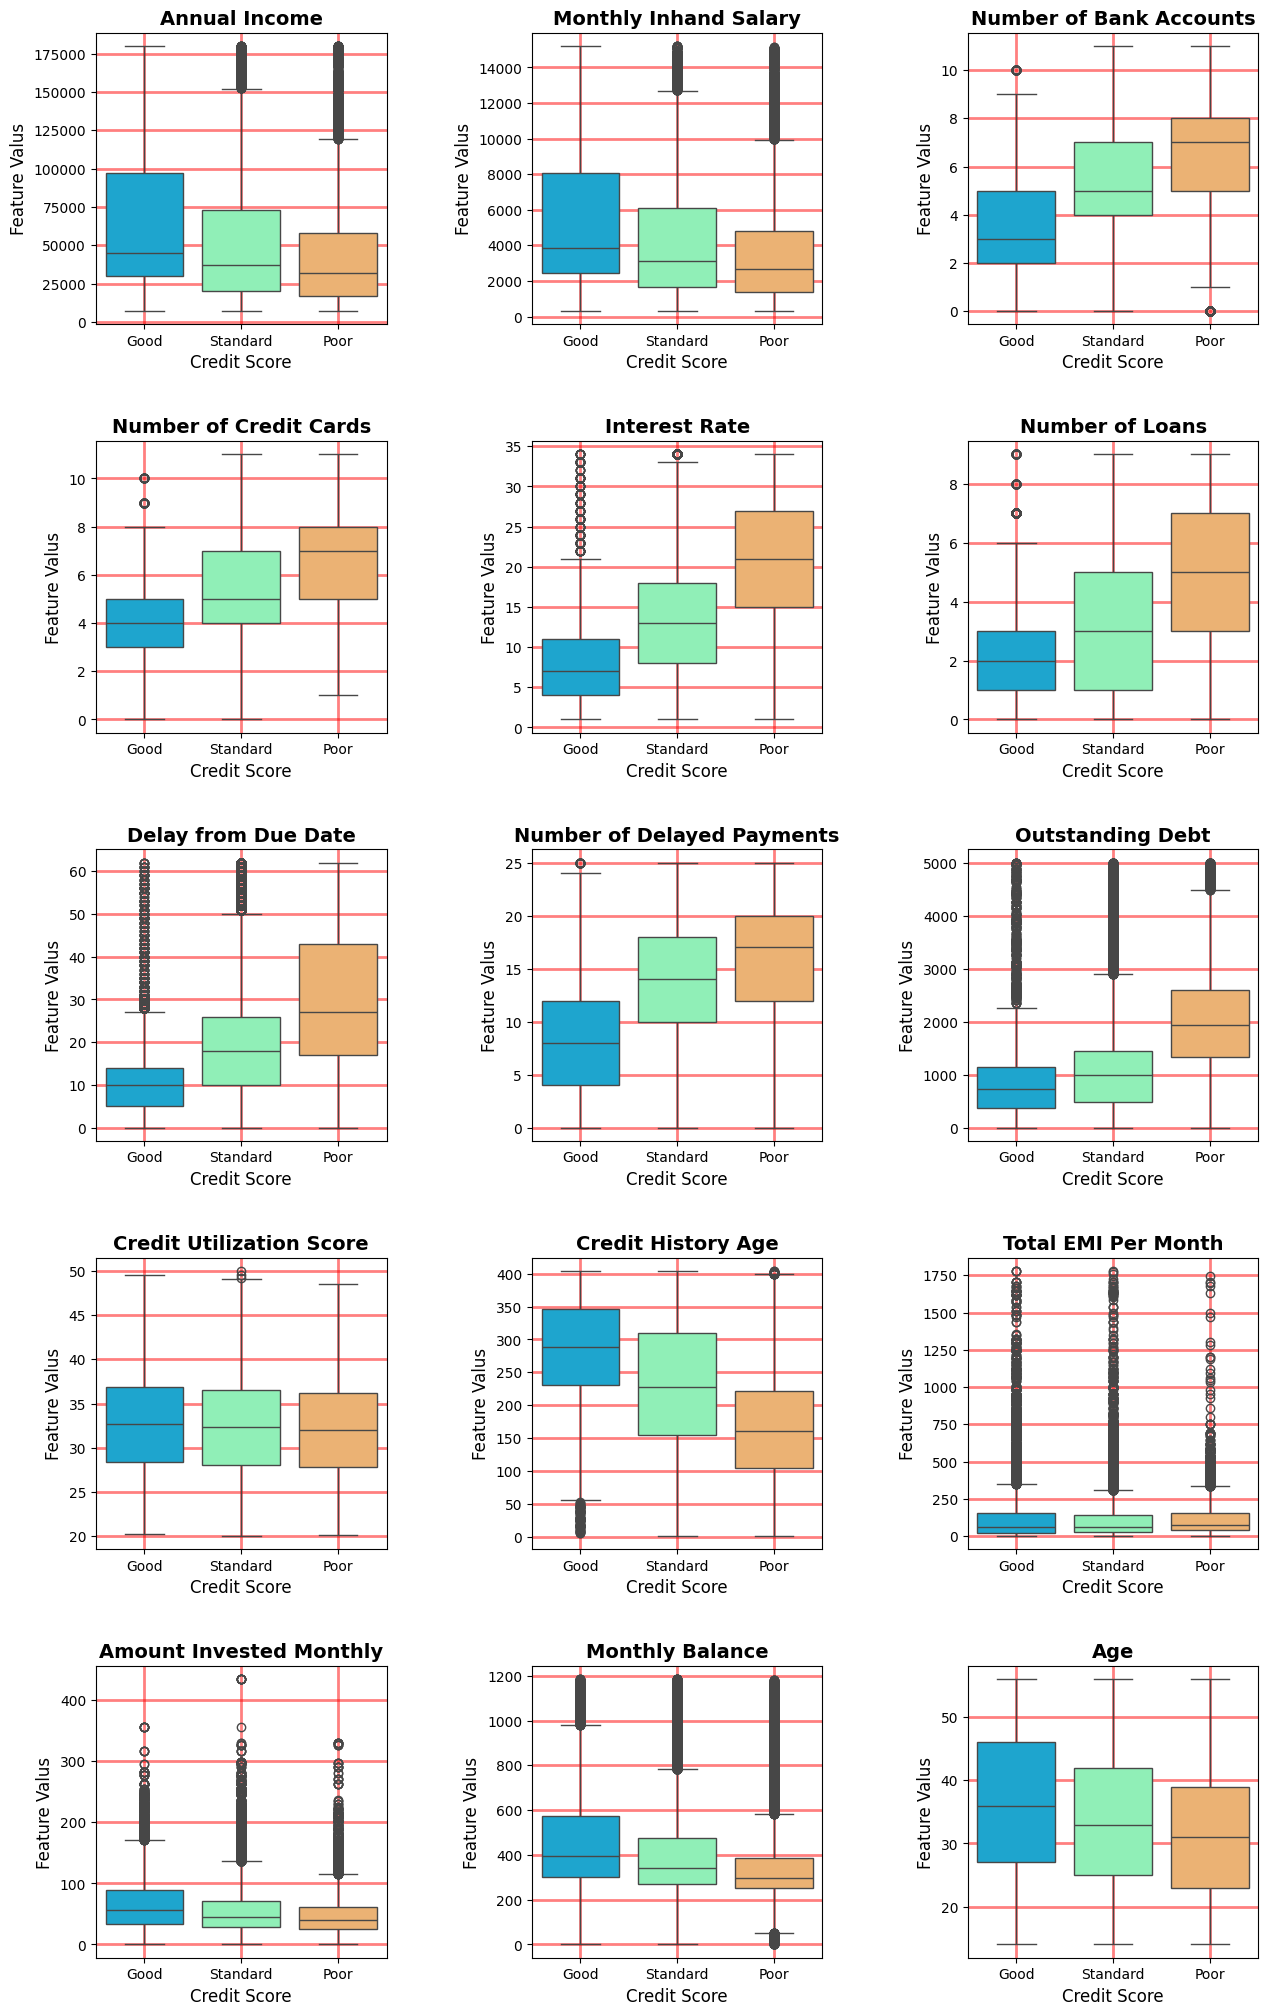

In [ ]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5,3,figsize=(15,25))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot Multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=ax[3],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, ax=ax[5],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=ax[6],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=ax[7],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=ax[9],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=ax[11],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=ax[12],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13],palette='rainbow')
sns.boxplot(x='Credit_Score', y='Age', data=df, ax=ax[14],palette='rainbow')

# Add a title and Labels
plt.title('Relationship between Credit Score and Different Features')
plt.xlabel("Credit Score")
plt.ylabel("Feature Values")


# Adjust the spaceing between sublots
fig.subplots_adjust(hspace=0.4,wspace=0.5)


# titles =
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards',
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']
# Add a white grids
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

# set font size for all x and y labels
for i in range(15):
  ax[i].set_xlabel("Credit Score", fontsize=12)
  ax[i].set_ylabel("Feature Valus",fontsize=12)

# Add a white grid
for i in range(15):
    ax[i].grid(color='red', linestyle='-', linewidth=2, alpha=0.5)

# Show plot
plt.show()





## From the 15 box plots above, we can deduce the following:

1. The more someone earns anually, the better their credit score is.
2. Similar to annual income, a higher monthly in-hand salary leads to a better credit score.
3. The ideal number of bank accounts is 2 - 4. Having more than 5 negatively affects your credit score.
4. Similar to bank accounts, having more than 5 credit cards will negatively affect your credit scores. The ideal number is 3-5.
5. 4 - 11% is the sweet spot for average instest rate. Anything above 15% is a no-no.
6. Take 1-3 loans at a time inorder to keep a good credit score. Having more than 3 loans negatively impacts credtit scores.
7. To maintain a good credit score, you have a 5-14 day delay window. Delaying for more than 17 days affects your credit score negatively.
8. Delaying 4-12 payments from the due date is the safety window. Anything above 12 payments negatively affexts credit scores.
9. An outstanding debt of $380 – $1150 will not affect your credit scores, but going above $1338 affects your credit scores negatively.
10. Your credit utilization ratio doesn’t affect your credit scores.
11. Having a long credit history results in better credit scores.
12. The number of EMIs you are paying in a month doesn’t affect credit scores that much.
13. How much you invest monthly doesn’t really affect your credit scores.
14. Having a high monthly balance in your account at the end of the month is good for your credit scores.
15. Credit scores tend to improve with an increase in age.



# Credit Score Classification Model



*   Credit_Mix colum is valuable for determine credit Score ;
*   Convert poor standed good -> 0 1 2



In [ ]:
# Before Transformation
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
# Transform the columns valus to 0 1 2
df["Credit_Mix"] = df["Credit_Mix"].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [ ]:
# After Transformation
df["Credit_Mix"].unique()

array([2, 1, 0])

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split
x = df[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age",
        "Monthly_Balance"]].values
y = df["Credit_Score"].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = LogisticRegression();
model.fit(X_train,y_train);
y_predict = model.predict(X_test);
# Total accurasy
print("accuracy",accuracy_score(y_test,y_predict))

print("classification report\n",classification_report(y_test,y_predict))

print("confusion matrix\n",confusion_matrix(y_test,y_predict))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.5417878787878788
classification report
               precision    recall  f1-score   support

        Good       0.42      0.05      0.08      5866
        Poor       0.53      0.32      0.40      9633
    Standard       0.55      0.83      0.66     17501

    accuracy                           0.54     33000
   macro avg       0.50      0.40      0.38     33000
weighted avg       0.52      0.54      0.48     33000

confusion matrix
 [[  271   116  5479]
 [   49  3111  6473]
 [  329  2675 14497]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=150,criterion='entropy', class_weight='balanced')

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=150)

In [96]:
# Making predictions on our model using the test data
y_predict = model.predict(X_test)

In [97]:
print('Classification Report\n', classification_report(y_test, y_predict))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test,y_predict))
print('\n')
print('Accuracy Score\n', accuracy_score(y_test, y_predict))

Classification Report
               precision    recall  f1-score   support

        Good       0.78      0.76      0.77      5866
        Poor       0.79      0.83      0.81      9633
    Standard       0.82      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.81      0.81      0.81     33000



Confusion Matrix
 [[ 4457    27  1382]
 [   30  7973  1630]
 [ 1262  2049 14190]]


Accuracy Score
 0.8066666666666666


Classifying customers based on their credit scores helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. A person with a good credit score will get loans from any bank and financial institution.